# 1. Imports

In [2]:
# Linear algebra and reading csv
import numpy as np
import pandas as pd

# Ploting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

# 2. Loading Data

In [6]:
df = pd.read_csv("../data/GMS_ProjectDataset.csv")
df.head()

person_id  GenderCategory  RaceCategory  EthnicityCategory  Age  Region  \
0          1               1             1                  1  100       2   
1          2               1             1                  1   80       1   
2          3               2             1                  1   87       1   
3          4               1             3                  2   82       4   
4          5               1             1                  1   87       2   

   Glipizide_Final  Glimepiride_Final  Glyburide_Final  Metformin_Final  ...  \
0              1.0                0.0              1.0              1.0  ...   
1              0.0                0.0              0.0              0.0  ...   
2              1.0                0.0              1.0              0.0  ...   
3              0.0                0.0              0.0              0.0  ...   
4              0.0                0.0              0.0              0.0  ...   

   Alzheimer_Final  FootUlcer_Final  Abnormal_Glucose_Final  DMScreen_Final  \
0              0.0              0.0                     0.0             0.0   
1              0.0              0.0                     0.0             0.0   
2              0.0              0.0                     0.0             0.0   
3              0.0              0.0                     0.0             0.0   
4              0.0              0.0                     0.0             0.0   

   A1C_Final  GlucoseTest_Final  InsulinTest_Final  DM_Drugs  AnyLab  \
0        0.0                0.0                0.0         1       0   
1        1.0                0.0                0.0         0       1   
2        0.0                0.0                0.0         1       0   
3        0.0                0.0                0.0         1       0   
4        0.0                0.0                0.0         0       0   

   Diabetes_Indicator  
0                 0.0  
1                 1.0  
2                 1.0  
3                 1.0  
4                 1.0  

[5 rows x 41 columns]

# 3. Data Stats and charcteristics

In [7]:
def get_data_char(df):
    data_columns = df.columns
    data_char_df = pd.DataFrame(df.dtypes, columns = ["d_type"])
    data_char_df["#_missing"] = df.isna().sum()
    data_char_df["%_missing"] = df.isna().sum() * 100 / df.shape[0]
    data_char_df["#_unique"] = df.nunique()
    data_char_df["%_unique"] = df.nunique() * 100 / df.shape[0]
    data_char_df["most_frequent"] = df.mode().loc[0]
    
    def get_stats_stats(df):
        return df.aggregate(["min", "max", "mean", "median", "std"]).T
    
    data_char_df = pd.concat([data_char_df,get_stats_stats(df), df.loc[:2,].T], axis = 1)    
    
    return data_char_df
display(get_data_char(df.iloc[:,1:]).style.background_gradient(subset = ["%_unique", "std", "median", "mean", "max", "min", "%_missing"], cmap = "Oranges"))

### Insights:
1. X: We have 17 independent variable, all of which are categorical in nature, except age which is interger. 
2. Y: The target "Diabetes_Indicator" is a binary variable, meaning this is a Binary Classification task
3. The dataset has missing values, and these are in the indicator columns.
4. Most unique column is Age with just 7% unique data, of which mmost frequent is 85.
5. All 11 indicator features except "A1C" have higher number of False indictor values except as their mean < 0.5
5. There are 4 columns with the most missing datapoints(123). This is interesting as all four columns have the same number of missing datapoints. This suggest that all four values of a row might be missing.
6. The target varible has a mean > 0.5 and median of 1, indicating that the number of positive class (+1) examples are larger than that of number of negative class examples (0)
                                     

## 3.1 Identify kind of missing data pattern:

We identify a pattern of missing datapoints:

1. In the set of 20 missing datapoints
2. In the set of 123 missing datapoints
3. In the set of 70 missing datapoints for target variable

### 3.1.1 Identify pattern in 20 datapoints 
1. Glipizide_Indicator
2. Glimepiride_Indicator
3. Glyburide_Indicator
4. Metformin_Indicator
5. Pioglitazone_Indicator 
6. Rosiglitazone_Indicator
7. DMDrug_Indicator

In [8]:
df[df["Glipizide_Final"].isna()].isna().sum()

person_id                         0
GenderCategory                    0
RaceCategory                      0
EthnicityCategory                 0
Age                               0
Region                            0
Glipizide_Final                  20
Glimepiride_Final                20
Glyburide_Final                  20
Metformin_Final                  20
Pioglitazone_Final               20
Rosiglitazone_Final              20
Beta_Blockers_Final              20
ACE_Inhibitors_Final             20
ARB_Final                        20
Diuretics_Final                  20
CCB_Final                        20
Vasodilators_Final               20
Alpha_Blockers_Final             20
Centrally_Acting_Agents_Final    20
Statins_Final                    20
Anti_Platelets_Final             20
Anti_Coagulants_Final            20
Oral_Steroids_Final              20
Heart_Disease_Final              15
Anemia_Final                     15
Kidney_Disease_Final             15
GERD_Final                  

#### Insight:
1. It appears there is a connection with above 7 indicators, as all columns have identical missing 20 datapoints together.
2. This pattern is appears to be either:
    1. _Missing Not at Random_: As it is possible that these column represent individuals who didn't take any medications 
    2. _Missing at Random_: There might be some systematic reason why the information is missing, maybe these were missed for a subgroup of participants.

### 3.1.2 Identify patterns in 123 missing datapoints for: 
1. A1C_Indicator
2. GlucoseTest_Indicator	
3. InsulinTest_Indicator
4. AnyLab_Indicator

In [7]:
df[df["A1C_Final"].isna()].isna().sum()

person_id                          0
GenderCategory                     0
RaceCategory                       0
EthnicityCategory                  0
Age                                0
Region                             0
Glipizide_Final                   16
Glimepiride_Final                 16
Glyburide_Final                   16
Metformin_Final                   16
Pioglitazone_Final                16
Rosiglitazone_Final               16
Beta_Blockers_Final               16
ACE_Inhibitors_Final              16
ARB_Final                         16
Diuretics_Final                   16
CCB_Final                         16
Vasodilators_Final                16
Alpha_Blockers_Final              16
Centrally_Acting_Agents_Final     16
Statins_Final                     16
Anti_Platelets_Final              16
Anti_Coagulants_Final             16
Oral_Steroids_Final               16
Heart_Disease_Final               67
Anemia_Final                      67
Kidney_Disease_Final              67
G

#### Insight:
Like previously, it appears there is a connection with above 4 indicators, as all columns have identical missing 123 datapoints together, might be **MNAR** or **MAR**.

### 3.1.3 Identify patterns in 70 missing datapoints for target variable

In [8]:
df[df["Diabetes_Indicator"].isna()].isna().sum()

person_id                         0
GenderCategory                    0
RaceCategory                      0
EthnicityCategory                 0
Age                               0
Region                            0
Glipizide_Final                  15
Glimepiride_Final                15
Glyburide_Final                  15
Metformin_Final                  15
Pioglitazone_Final               15
Rosiglitazone_Final              15
Beta_Blockers_Final              15
ACE_Inhibitors_Final             15
ARB_Final                        15
Diuretics_Final                  15
CCB_Final                        15
Vasodilators_Final               15
Alpha_Blockers_Final             15
Centrally_Acting_Agents_Final    15
Statins_Final                    15
Anti_Platelets_Final             15
Anti_Coagulants_Final            15
Oral_Steroids_Final              15
Heart_Disease_Final              70
Anemia_Final                     70
Kidney_Disease_Final             70
GERD_Final                  

#### Insight:
All rows with missing Diabetes_Indicator has some other missing datapoint.

## 3.2 Duplicate rows

In [9]:
df = df.drop("person_id", axis = 1)
df[df.duplicated()]

GenderCategory  RaceCategory  EthnicityCategory  Age  Region  \
140               2             1                  1   87       3   
147               1             1                  1   95       1   
203               2             1                  1   81       4   
283               1             2                  1   84       3   
295               2             1                  1   86       1   
380               2             1                  1   97       3   
409               1             1                  1   80       1   
411               2             1                  1   82       2   
453               2             1                  1   80       3   
465               2             1                  1   84       3   
515               1             3                  1   84       4   
537               1             1                  1   94       4   
573               2             1                  1   86       3   
595               2             1                  1   99       1   
617               2             1                  1   86       1   
622               2             1                  1   93       3   
625               2             1                  1   93       3   
635               2             1                  1   86       3   
658               2             1                  1   96       1   
690               2             1                  1   82       2   
692               1             1                  1   95       3   
724               2             1                  1   93       3   
725               2             1                  1   83       3   
737               1             1                  1   82       3   
739               1             1                  1   81       2   
744               2             1                  1   88       3   
759               1             1                  1   82       2   
761               1             1                  1   88       1   
778               2             1                  1   83       3   
799               2             1                  1   87       3   
805               1             1                  1   90       4   
810               1             1                  1   97       1   
816               2             1                  1   88       3   
844               2             2                  1  100       3   
874               1             1                  1   96       4   
885               1             1                  1   84       2   
890               2             1                  1   80       3   
899               1             1                  1   86       2   
921               2             1                  1   91       1   
926               2             1                  1   83       2   
929               2             1                  1   84       2   
937               1             1                  1   72       2   

     Glipizide_Final  Glimepiride_Final  Glyburide_Final  Metformin_Final  \
140              0.0                0.0              0.0              0.0   
147              0.0                0.0              0.0              0.0   
203              0.0                0.0              0.0              0.0   
283              0.0                0.0              0.0              0.0   
295              0.0                0.0              0.0              0.0   
380              0.0                0.0              0.0              0.0   
409              0.0                0.0              0.0              0.0   
411              0.0                0.0              0.0              0.0   
453              0.0                0.0              0.0              0.0   
465              0.0                0.0              0.0              0.0   
515              0.0                0.0              0.0              0.0   
537              0.0                0.0              0.0              0.0   
573              0.0                

#### Insights:
1. There are 42 duplicated rows

# 4. EDA

In this section, we explore the traits of features and relationships among the features, we explore univarite, bivariate and finally multivariate relationships.

In [18]:
cat_cols = ['RaceCategory', 'EthnicityCategory', 'Region', 'Glipizide_Final',
       'Glimepiride_Final', 'Glyburide_Final', 'Metformin_Final',
       'Pioglitazone_Final', 'Rosiglitazone_Final', 'Beta_Blockers_Final',
       'ACE_Inhibitors_Final', 'ARB_Final', 'Diuretics_Final', 'CCB_Final',
       'Vasodilators_Final', 'Alpha_Blockers_Final',
       'Centrally_Acting_Agents_Final', 'Statins_Final',
       'Anti_Platelets_Final', 'Anti_Coagulants_Final', 'Oral_Steroids_Final',
       'Heart_Disease_Final', 'Anemia_Final', 'Kidney_Disease_Final',
       'GERD_Final', 'Neuropathy_Final', 'Eye_Disorder_Final',
       'Atherosclerosis_Final', 'Alzheimer_Final', 'FootUlcer_Final',
       'Abnormal_Glucose_Final', 'DMScreen_Final', 'A1C_Final',
       'GlucoseTest_Final', 'InsulinTest_Final', 'DM_Drugs', 'AnyLab']
num_cols = ["Age"]
target_cols = df.columns[-1:]

print("Categorical columns:", cat_cols)
print("Numerical columns:",num_cols)
print("Target column:", target_cols)

Categorical columns: ['RaceCategory', 'EthnicityCategory', 'Region', 'Glipizide_Final', 'Glimepiride_Final', 'Glyburide_Final', 'Metformin_Final', 'Pioglitazone_Final', 'Rosiglitazone_Final', 'Beta_Blockers_Final', 'ACE_Inhibitors_Final', 'ARB_Final', 'Diuretics_Final', 'CCB_Final', 'Vasodilators_Final', 'Alpha_Blockers_Final', 'Centrally_Acting_Agents_Final', 'Statins_Final', 'Anti_Platelets_Final', 'Anti_Coagulants_Final', 'Oral_Steroids_Final', 'Heart_Disease_Final', 'Anemia_Final', 'Kidney_Disease_Final', 'GERD_Final', 'Neuropathy_Final', 'Eye_Disorder_Final', 'Atherosclerosis_Final', 'Alzheimer_Final', 'FootUlcer_Final', 'Abnormal_Glucose_Final', 'DMScreen_Final', 'A1C_Final', 'GlucoseTest_Final', 'InsulinTest_Final', 'DM_Drugs', 'AnyLab']
Numerical columns: ['Age']
Target column: Index(['Diabetes_Indicator'], dtype='object')


In [19]:
def map_df(data):
    data["GenderCategory"] = data["GenderCategory"].map({1: "Female", 2: "Male"})
    data["RaceCategory"] = data["RaceCategory"].map({1:"White", 2:"Black", 3:"Unknown"})
    data["EthnicityCategory"] = data["EthnicityCategory"].map({1: "Non-Hispanic", 2:"Hispanic", 3: "Unknown"})
    data["Region"] = data["Region"].map({1: "Northeast", 2: "Midwest", 3: "South", 4: "West", 5: "Unknown"})

    return data

df_eda = map_df(df.copy(deep = True))

## 4.1 Univariate

### 4.1.1 Target Variable

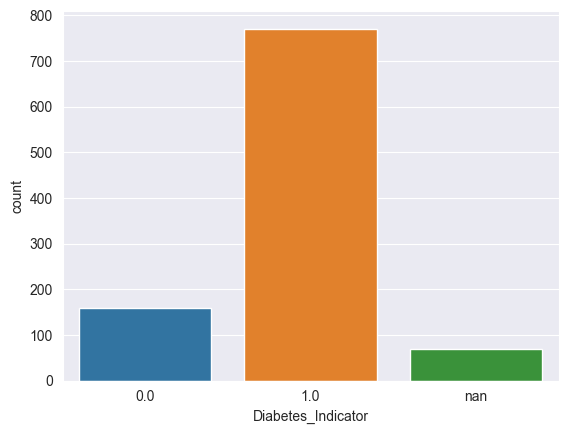

In [20]:
sns.countplot(x = df_eda["Diabetes_Indicator"].fillna("nan"), palette=sns.color_palette("tab10"));

### 4.1.2 Dependent varibles

In [21]:
df_eda[cat_cols[i]].fillna("nan").value_counts()

EthnicityCategory
Non-Hispanic    980
Hispanic         20
Name: count, dtype: int64

In [25]:
len(cat_cols)

37

#### 4.1.2.1 Categorical

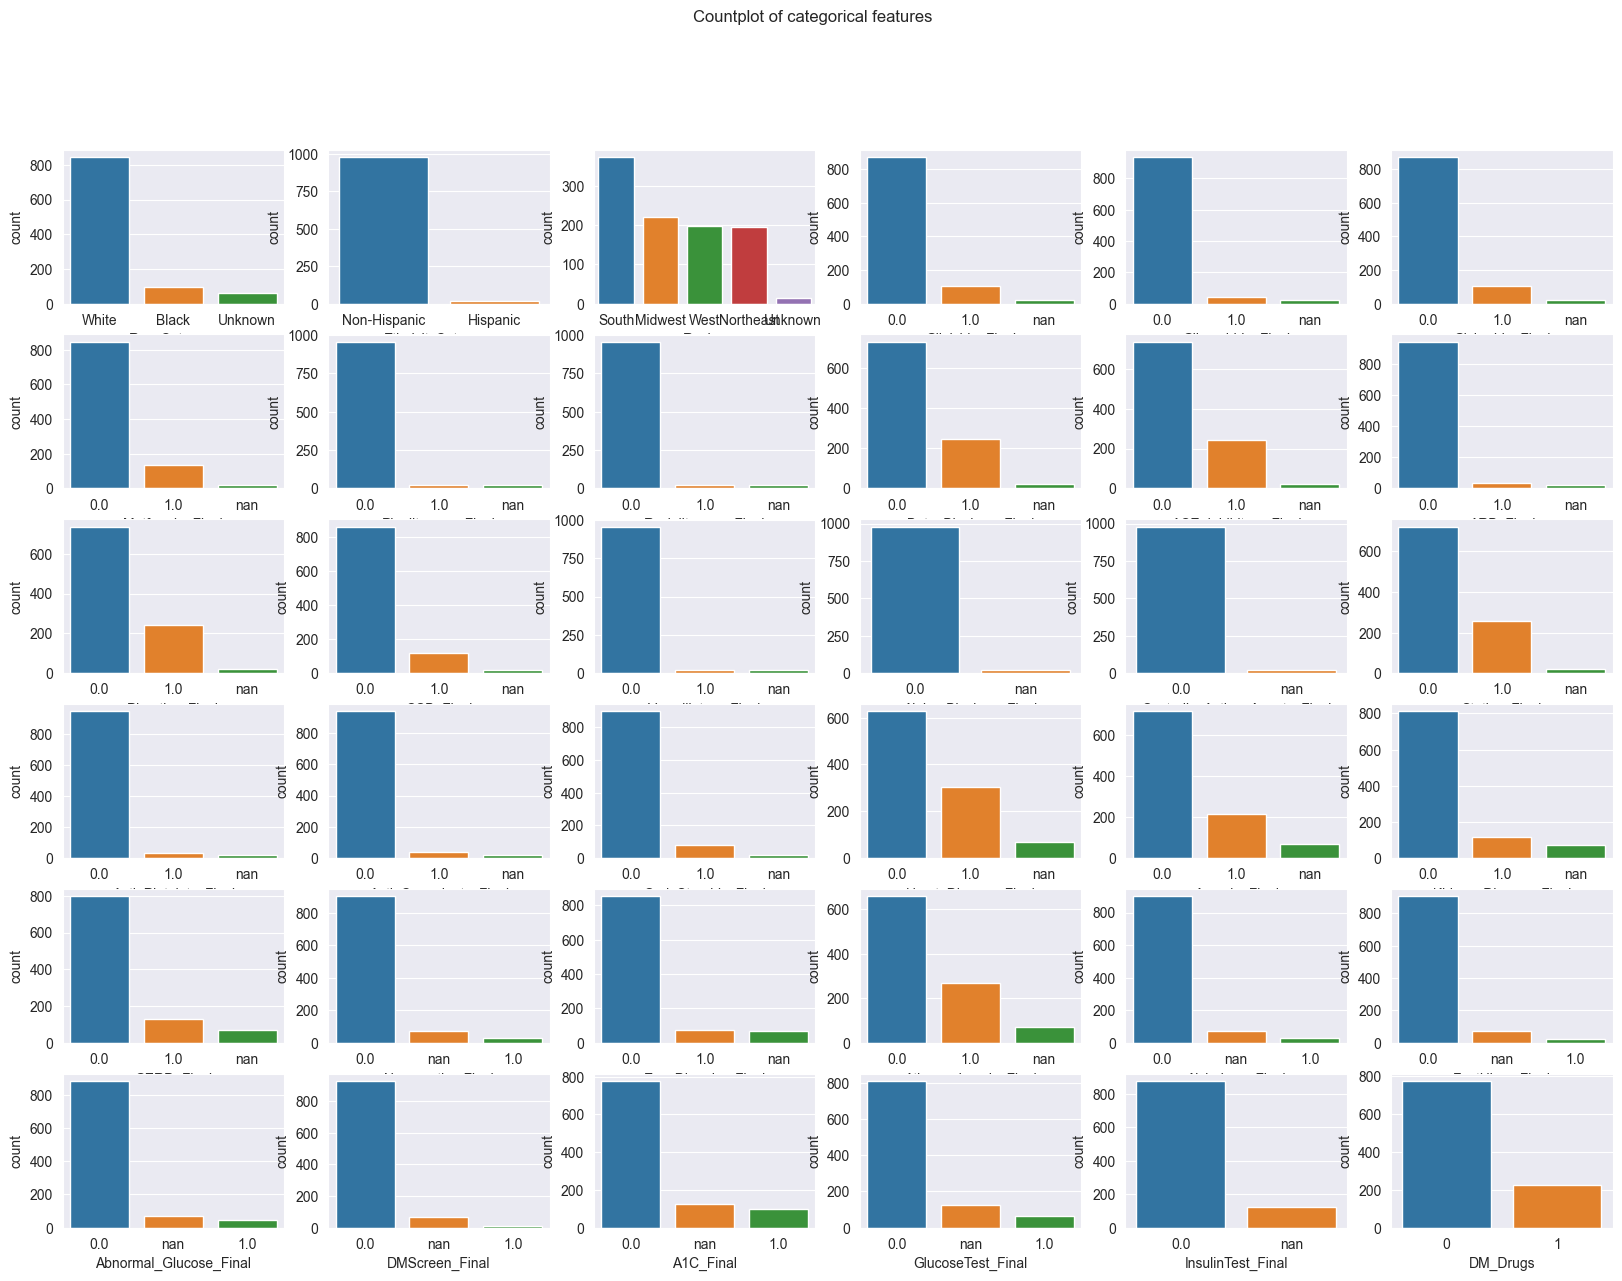

In [27]:
fig, axes = plt.subplots(6, 6, figsize = (20,14))
fig.suptitle('Countplot of categorical features')
for i in range(36):
    sns.countplot(
        x = df_eda[cat_cols[i]].fillna("nan"),
        palette=sns.color_palette("tab10"), 
        order = df_eda[cat_cols[i]].fillna("nan").value_counts().index,
        ax = axes[i//6, i%6])
plt.show()

#### Insights:

1. The dataset has higher men and is has high imbalances for the race and ethinicity.
2. The dataset is focused from people in different parts of the country with South having the highesh percentage.
3. As for the 2 out of 11 indicator features, "InsulinTest_Indicators" and "DMScreen_Indicator" has more nans than one of the permissible values for the column.
4. For all 11 indicator features, except A1C, all have higher False indication values.

#### 4.1.2.1 Numerical

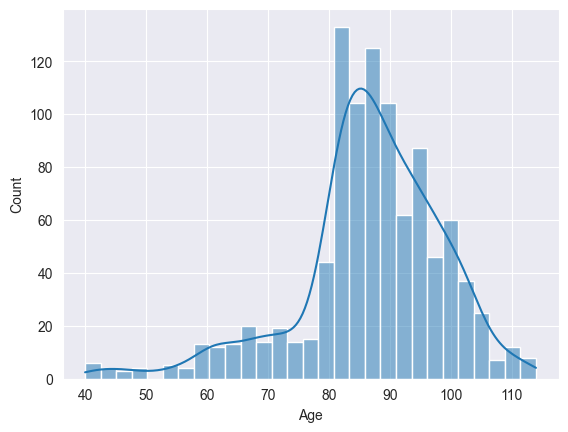

In [29]:
sns.histplot(data = df_eda, x = "Age", kde = True, palette=sns.color_palette("tab10"));

#### Insights:

1. The "Age" follows a somewhat Normal distribution with a slight skewness to the left.
2. The median and mean are 87 and 86.76 respectively.

## 4.2 Bivariavte

### 4.2.1 Relation of dependent features with target

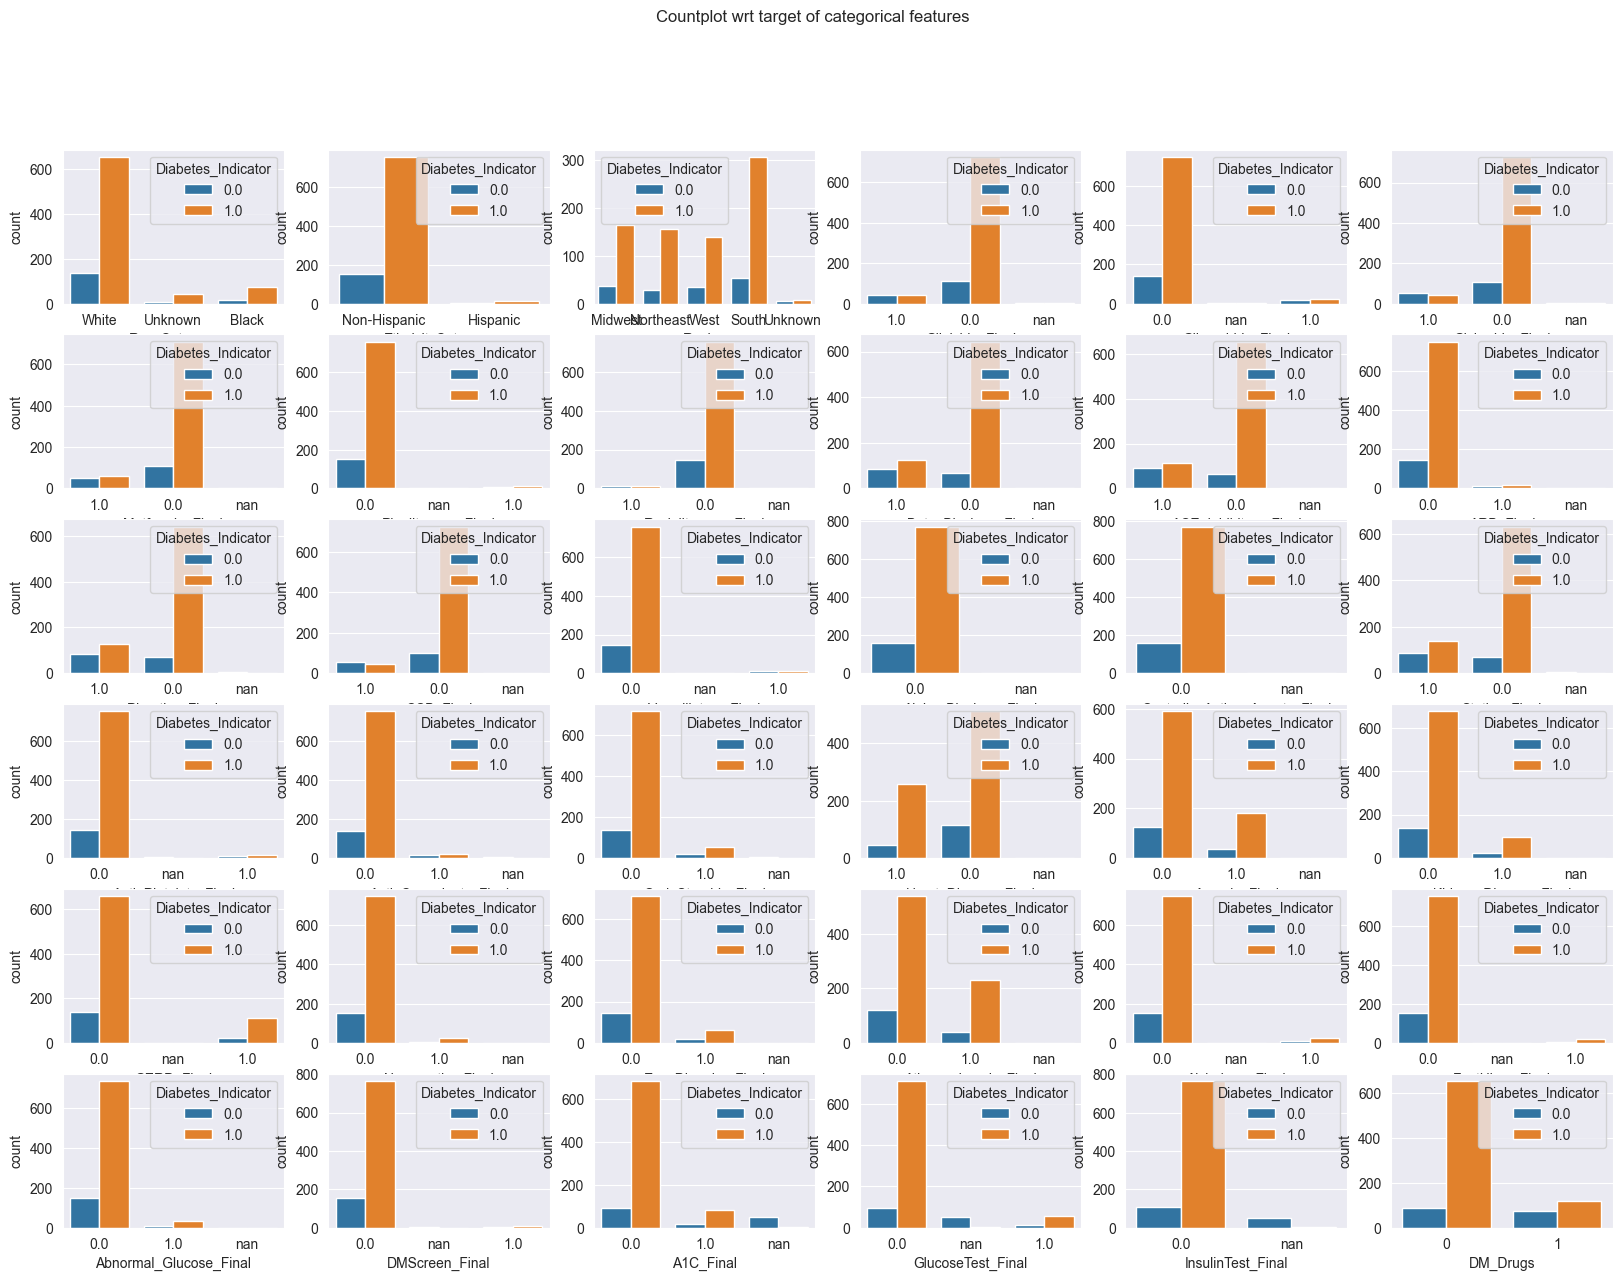

In [30]:
fig, axes = plt.subplots(6, 6, figsize = (20,14))
fig.suptitle('Countplot wrt target of categorical features')
for i in range(36):
    sns.countplot(
        x = df_eda[cat_cols[i]].fillna("nan"), 
        palette=sns.color_palette("tab10"), 
        hue = df_eda["Diabetes_Indicator"],
        ax = axes[i//6, i%6])
plt.show()

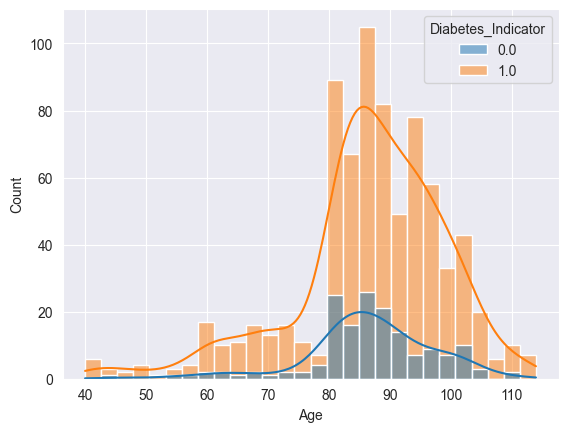

In [31]:
sns.histplot(data = df_eda, x = "Age", kde = True, hue = "Diabetes_Indicator", palette=sns.color_palette("tab10"));

In [34]:
df_eda = df_eda.drop(["InsulinTest_Final","person_id", 'Alpha_Blockers_Final', 'Centrally_Acting_Agents_Final'], axis =1 )

## 4.3 Multivariate Heatmap - Cramer's V
Since most of the variable are categorical, Cramer's V correlation makes more sense.

In [35]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0] 
    obs = np.sum(crosstab)
    mini = min(crosstab.shape)-1 
    return np.sqrt(stat/(obs*mini))


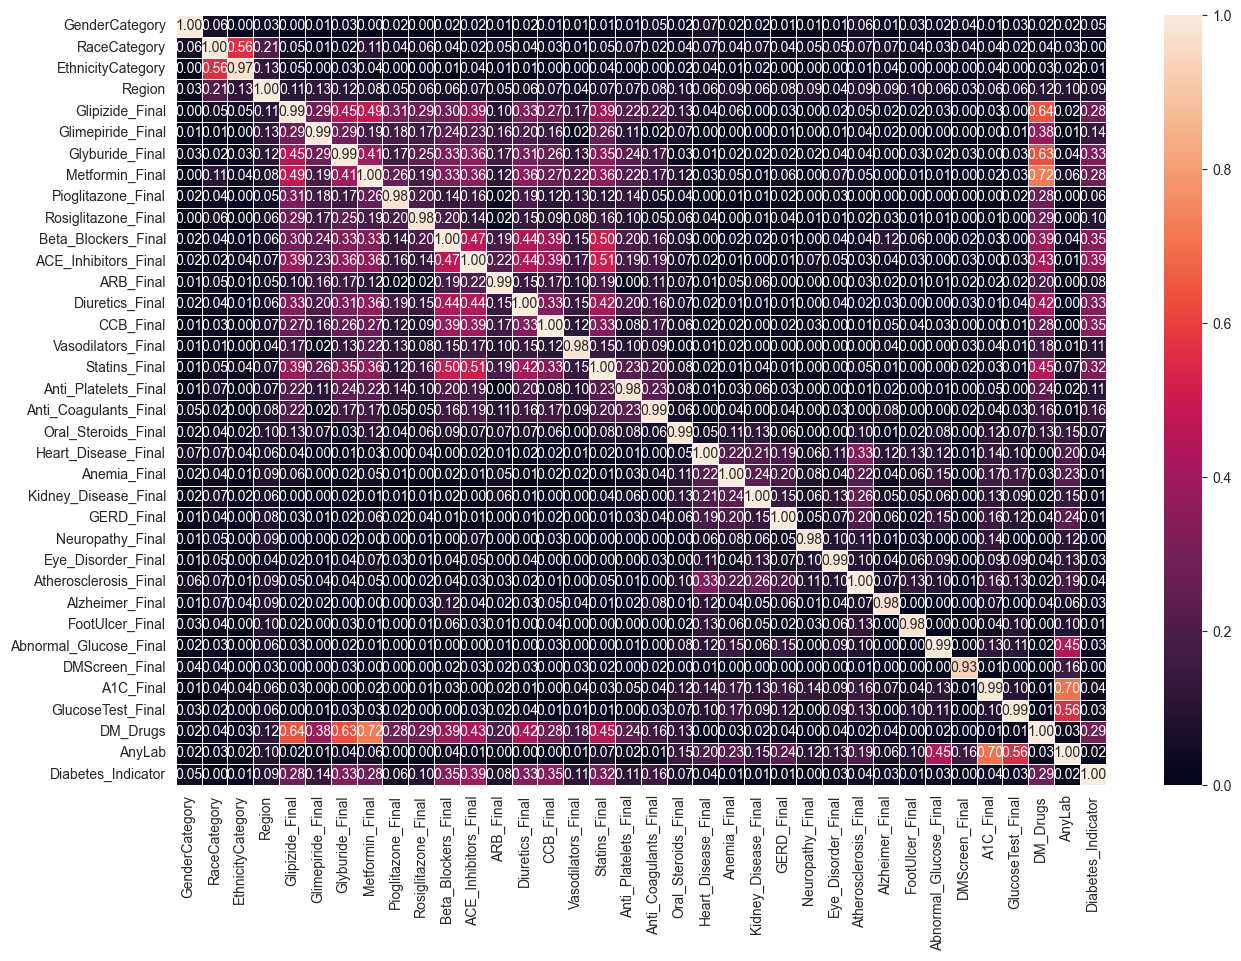

In [37]:
df_corr = df_eda.drop("Age", axis = 1)
rows= []
for var1 in df_corr:
    col = []
    for var2 in df_corr :
        cramers =cramers_V(df_corr[var1], df_corr[var2])
        col.append(round(cramers,2))
    rows.append(col)
  
cramers_results = np.array(rows)
df_corr_cramers = pd.DataFrame(cramers_results, columns = df_corr.columns, index =df_corr.columns)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr_cramers, annot = True, fmt = ".2f", ax=ax, linewidths=.5);



#### Insight:
1. High correlation with DMDrug_Indicator:
    Glipizide_Indicator (0.61), Glyburide_Indicator (0.66), Metformin_Indicator (0.70)

2. High correlation with AnyLab_Indicator:
A1C_Indicator (0.79), GlucoseTest_Indicator (0.59)

3. Diabetes_Indicator is weak correlation with AnyLab_Indicator (0.37) and A1C_Indicator (0.31)

## 4.4. Y_Data Profiling

In [38]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report')

In [39]:
profile.to_file("output_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
profile

Questions to ask:
1. General comments on varibles.
2. Imputation ->